In [120]:
# import packages
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [39]:

# read the dataset into python
df = pd.read_csv('Demanda_Diaria_Metro_2015_2024.csv', delimiter=',')
df.head()

,Fecha,Demanda
0,2015-01-01,551814
1,2015-01-02,1538946
2,2015-01-03,1150162
3,2015-01-04,930805
4,2015-01-05,1651540


Son datos diarios

In [40]:
dtypes = df.dtypes
dtypes


Fecha      object
Demanda     int64
dtype: object

In [41]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df

,Fecha,Demanda
0,2015-01-01,551814
1,2015-01-02,1538946
2,2015-01-03,1150162
3,2015-01-04,930805
4,2015-01-05,1651540
...,...,...
3586,2024-11-26,2486822
3587,2024-11-27,2541525
3588,2024-11-28,2724600
3589,2024-11-29,2783341


In [42]:
dtypes = df.dtypes
dtypes

Fecha      datetime64[ns]
Demanda             int64
dtype: object

In [43]:
df.shape

(3591, 2)

In [44]:
 # Hay nulos??
print(df.isnull().sum()) 

Fecha      0
Demanda    0
dtype: int64


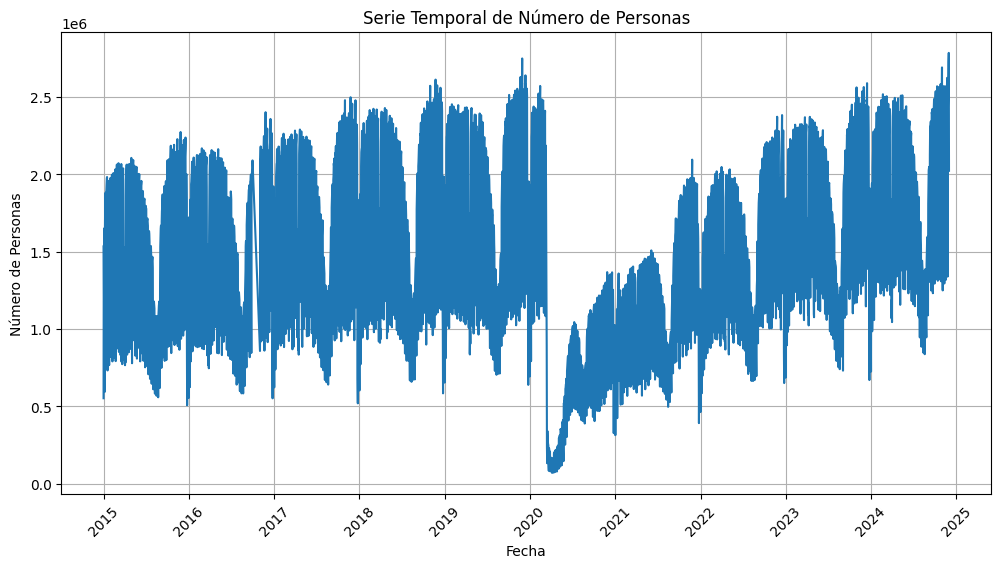

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'fecha' y 'num_personas'
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Asegurarse de que la columna de fechas esté en formato datetime
df = df.sort_values(by='Fecha')  # Ordenar por fecha si no está ordenado

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Demanda'],  linestyle='-')

# Personalización del gráfico
plt.xlabel('Fecha')
plt.ylabel('Número de Personas')
plt.title('Serie Temporal de Número de Personas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(True)

# Mostrar el gráfico
plt.show()

Definimos 2 conjuntos: test y train

In [72]:
training_set = df.iloc[84:, 1:2].values
test_set = df.iloc[:84, 1:2].values

In [73]:
test_set.shape

(84, 1)

In [74]:
training_set.shape

(3507, 1)

In [75]:
training_set.shape[0]

3507

El objetivo e predecir la demanda diaria de viajeros en el metro de madrid
Nos creamos una matriz de datos donde la variable objetivo es la demanada y las variables input son las 60 observaciones escalado con MinMax

In [76]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(30, training_set.shape[0]):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [77]:
X_train.shape

(3477, 30, 1)

In [78]:
model = Sequential()
    # Add an LSTM layer to process sequences of words
model.add(LSTM(50))
    # Add a dense layer with sigmoid activation for binary classification (0 or 1)
model.add(Dense(1, activation='sigmoid'))
    # Compile the model with loss function, optimizer, and metrics
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [79]:

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0448 
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0301 
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0295 
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0281 
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0280 
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0275 
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0267 
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 
Epoch 9/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 
Epoch 10/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 


In [80]:
test_set.shape[0]

84

In [151]:
test_set = df.iloc[:114, 1:2].values

In [152]:
test_set_scaled = sc.fit_transform(test_set)


In [153]:
test_set_scaled.shape[0]

114

In [154]:
X_test = []
for i in range(30, test_set_scaled.shape[0]):
    X_test.append(test_set_scaled[i-30:i, 0])
X_test = np.array(X_test)

In [155]:
X_test.shape

(84, 30)

In [156]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#print(X_test.shape)
# (459, 60, 1)

In [157]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step 


In [158]:
y_pred

array([[1233946.6 ],
       [1090108.4 ],
       [1666963.9 ],
       [1691801.5 ],
       [1728556.2 ],
       [1762245.8 ],
       [1812166.  ],
       [1299675.4 ],
       [1050215.6 ],
       [1622179.5 ],
       [1667657.9 ],
       [1767361.5 ],
       [1794801.9 ],
       [1826413.4 ],
       [1319491.9 ],
       [1067133.1 ],
       [1676483.4 ],
       [1731769.4 ],
       [1771613.5 ],
       [1794785.4 ],
       [1826417.5 ],
       [1304295.5 ],
       [1057236.6 ],
       [1651954.9 ],
       [1680295.2 ],
       [1777347.4 ],
       [1799107.1 ],
       [1829879.8 ],
       [1326969.8 ],
       [1071333.9 ],
       [1689902.9 ],
       [1741253.1 ],
       [1785072.4 ],
       [1802537.8 ],
       [1835227.  ],
       [1320678.  ],
       [1071146.4 ],
       [1665549.2 ],
       [1704844.2 ],
       [1801795.8 ],
       [1814728.9 ],
       [1842777.9 ],
       [1358258.8 ],
       [1091403.4 ],
       [1692612.9 ],
       [1729658.8 ],
       [1803600.5 ],
       [18190

retocar esto....

In [159]:
training_set

array([[2036899],
       [1860100],
       [1067890],
       ...,
       [2724600],
       [2783341],
       [2021444]])

In [160]:
df['Fecha'].iloc[-84:].shape

(84,)

In [161]:
df['Fecha'].iloc[-84:].values

array(['2024-09-08T00:00:00.000000000', '2024-09-09T00:00:00.000000000',
       '2024-09-10T00:00:00.000000000', '2024-09-11T00:00:00.000000000',
       '2024-09-12T00:00:00.000000000', '2024-09-13T00:00:00.000000000',
       '2024-09-14T00:00:00.000000000', '2024-09-15T00:00:00.000000000',
       '2024-09-16T00:00:00.000000000', '2024-09-17T00:00:00.000000000',
       '2024-09-18T00:00:00.000000000', '2024-09-19T00:00:00.000000000',
       '2024-09-20T00:00:00.000000000', '2024-09-21T00:00:00.000000000',
       '2024-09-22T00:00:00.000000000', '2024-09-23T00:00:00.000000000',
       '2024-09-24T00:00:00.000000000', '2024-09-25T00:00:00.000000000',
       '2024-09-26T00:00:00.000000000', '2024-09-27T00:00:00.000000000',
       '2024-09-28T00:00:00.000000000', '2024-09-29T00:00:00.000000000',
       '2024-09-30T00:00:00.000000000', '2024-10-01T00:00:00.000000000',
       '2024-10-02T00:00:00.000000000', '2024-10-03T00:00:00.000000000',
       '2024-10-04T00:00:00.000000000', '2024-10-05

In [162]:
y_pred.shape

(84, 1)

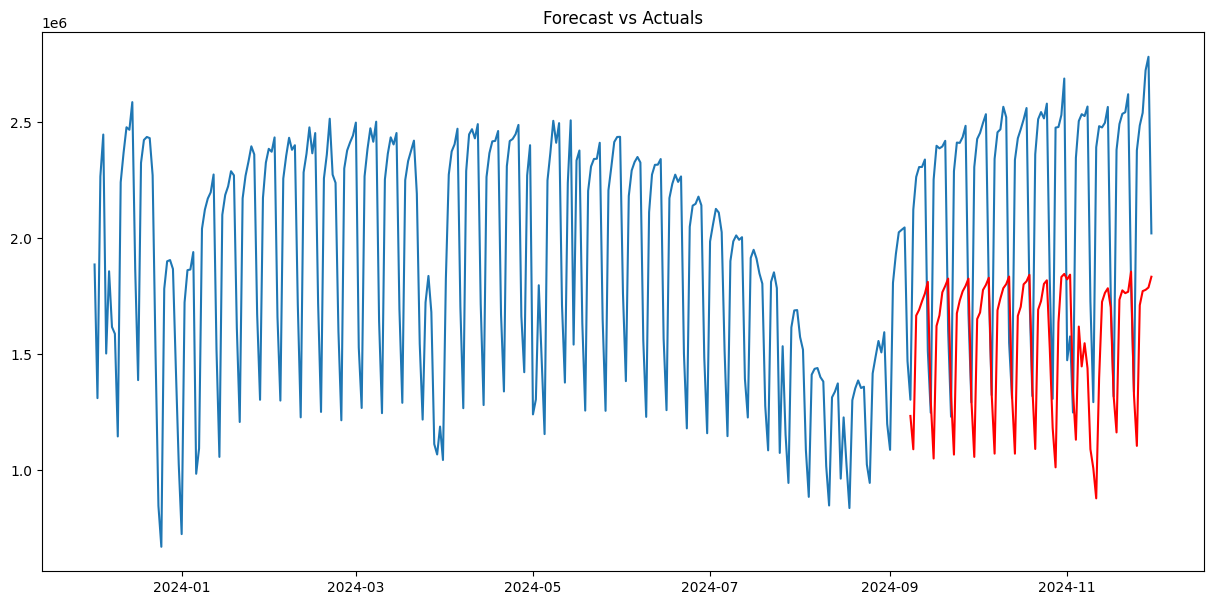

In [164]:
plt.figure(figsize=(15, 7))

plt.plot(df['Fecha'].iloc[-365:], df['Demanda'].iloc[-365:])
plt.plot(df['Fecha'].iloc[-84:], y_pred, color='red', linestyle='-')
#plt.plot(predictions_pmd, color='gray')
#plt.plot(test, color='blue')
plt.title('Forecast vs Actuals')
plt.show()

In [165]:
from statsmodels.tsa.stattools import acf
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    resultados={'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax}
    pd.options.display.float_format = '{:.6f}'.format #esto es para que lo pinte en formato float
    df = pd.DataFrame(resultados.items(), columns=["Métrica", "Valor"])
    return(df)


In [166]:
 df['Demanda'].iloc[-24:].to_numpy()


array([2527541, 2568631, 1727221, 1293345, 2393150, 2484037, 2478468,
       2498651, 2566905, 1756434, 1317871, 2381845, 2493263, 2537142,
       2544040, 2621743, 1803141, 1337813, 2379559, 2486822, 2541525,
       2724600, 2783341, 2021444])

In [167]:
y_pred.T[0]

array([1233946.6 , 1090108.4 , 1666963.9 , 1691801.5 , 1728556.2 ,
       1762245.8 , 1812166.  , 1299675.4 , 1050215.6 , 1622179.5 ,
       1667657.9 , 1767361.5 , 1794801.9 , 1826413.4 , 1319491.9 ,
       1067133.1 , 1676483.4 , 1731769.4 , 1771613.5 , 1794785.4 ,
       1826417.5 , 1304295.5 , 1057236.6 , 1651954.9 , 1680295.2 ,
       1777347.4 , 1799107.1 , 1829879.8 , 1326969.8 , 1071333.9 ,
       1689902.9 , 1741253.1 , 1785072.4 , 1802537.8 , 1835227.  ,
       1320678.  , 1071146.4 , 1665549.2 , 1704844.2 , 1801795.8 ,
       1814728.9 , 1842777.9 , 1358258.8 , 1091403.4 , 1692612.9 ,
       1729658.8 , 1803600.5 , 1819015.5 , 1526589.6 , 1182372.1 ,
       1012196.06, 1637801.2 , 1833335.5 , 1846576.8 , 1823129.5 ,
       1843399.2 , 1337596.1 , 1131351.8 , 1619493.5 , 1447553.4 ,
       1547591.5 , 1439872.2 , 1090478.  , 1008157.6 ,  878415.94,
       1397020.9 , 1726018.9 , 1764743.4 , 1784745.9 , 1701857.  ,
       1320250.9 , 1162809.6 , 1735393.5 , 1775661.9 , 1763604

In [169]:
forecast_accuracy(y_pred.T[0], df['Demanda'].iloc[-84:].to_numpy())

,Métrica,Valor
0,mape,0.279566
1,me,-610672.575893
2,mae,659513.650298
3,mpe,-0.247318
4,rmse,768090.050611
5,acf1,0.146388
6,corr,0.300867
7,minmax,0.277524


In [170]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


C:\Users\tomas\ML\deep\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0852
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0324
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0331
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0326
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0313
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0300
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0318
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0313
Epoch 9/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0319
Epoch 10/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0315
Epoch 11/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0299
Epoch 12/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0301
Epoch 13/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0304
Epoch 14/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0303
Epoch 15/100
109/109 ━━━━━━━━━━━━━━━━━━━

In [171]:

y_pred2 = model.predict(X_test)
y_pred2 = sc.inverse_transform(y_pred2)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step


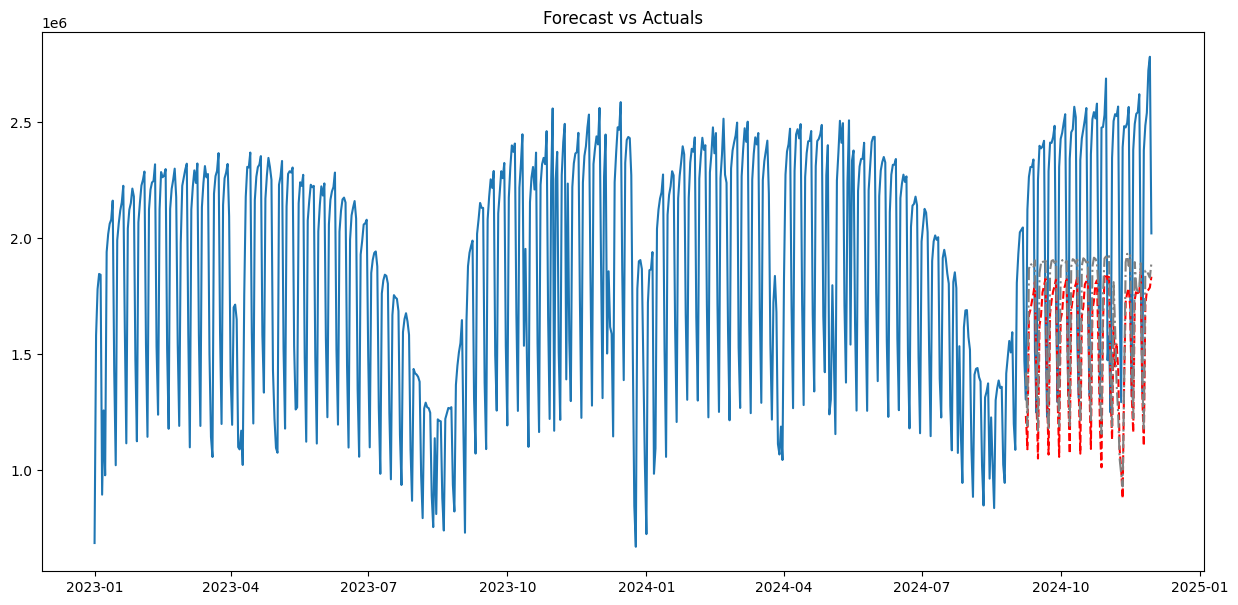

In [173]:
plt.figure(figsize=(15, 7))

plt.plot(df['Fecha'].iloc[-700:], df['Demanda'].iloc[-700:])
plt.plot(df['Fecha'].iloc[-84:], y_pred, color='red', linestyle='--')
plt.plot(df['Fecha'].iloc[-84:], y_pred2, color='gray', linestyle='-.')
#plt.plot(predictions_pmd, color='gray')
#plt.plot(test, color='blue')
plt.title('Forecast vs Actuals')
plt.show()

In [144]:
forecast_accuracy(y_pred2.T[0], df['Demanda'].iloc[-24:].to_numpy())

,Métrica,Valor
0,mape,0.328706
1,me,-643509.018229
2,mae,772293.966146
3,mpe,-0.232221
4,rmse,881637.688592
5,acf1,0.455073
6,corr,-0.377804
7,minmax,0.316235
